In [7]:
import numpy as np
import pandas as pd

from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import  LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import json

import warnings
warnings.filterwarnings('ignore')
import config

### Problem statement

In [ ]:
predict heart disease using following features:
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'

### Data gathering

In [8]:
df=pd.read_csv(r"G:\Python\heart_disease\Heart Disease Prediction\CSV_File\heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


### EDA

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Data Cleaning:

In [ ]:
no missing value present
all feature having int datatype

### Feature Engineering

#### checking outliers:

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

### 1.age

<AxesSubplot: xlabel='age'>

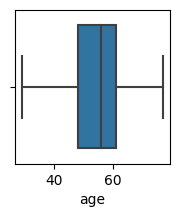

In [13]:
plt.figure(figsize=(2,2))
sns.boxplot(x=df["age"])

### 2.trestbps	

<AxesSubplot: xlabel='trestbps'>

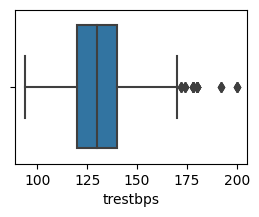

In [17]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["trestbps"])

In [28]:
# handling outliers
q1,q3 = np.quantile(df['trestbps'], [0.25,0.75])
iqr = q3-q1

upper_tail = q3 + 1.5*iqr
df['trestbps'] = np.where(df['trestbps'] >upper_tail, upper_tail, df['trestbps'] )

<AxesSubplot: xlabel='trestbps'>

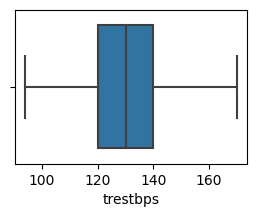

In [34]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["trestbps"])

### 3.thalach

<AxesSubplot: xlabel='thalach'>

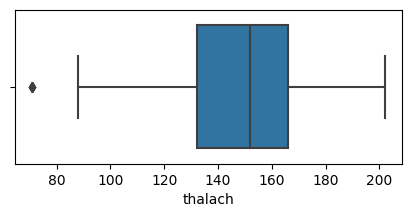

In [22]:
plt.figure(figsize=(5,2))
sns.boxplot(x=df["thalach"])

In [47]:
q1,q3 = np.quantile(df['thalach'], [0.25,0.75])
iqr = q3-q1

lower_tail = q1 - 1.5*iqr
df['thalach'] = np.where(df['thalach'] <lower_tail, lower_tail, df['thalach'] )

<AxesSubplot: xlabel='thalach'>

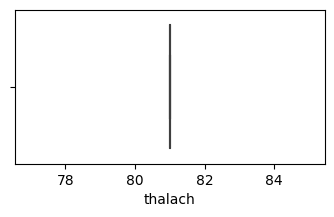

In [50]:
plt.figure(figsize=(4,2))
sns.boxplot(x=df["thalach"])

### 4.chol	

<AxesSubplot: xlabel='chol'>

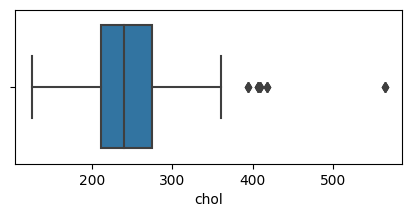

In [23]:
plt.figure(figsize=(5,2))
sns.boxplot(x=df["chol"])

In [56]:
q1,q3 = np.quantile(df['chol'], [0.25,0.75])
iqr = q3-q1

upper_tail = q3 + 1.5*iqr
df['chol'] = np.where(df['chol'] >upper_tail, upper_tail, df['chol'] )

<AxesSubplot: xlabel='chol'>

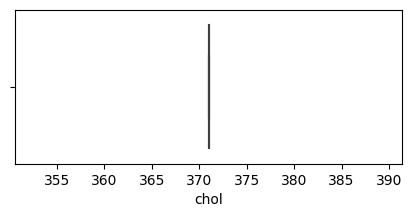

In [58]:
plt.figure(figsize=(5,2))
sns.boxplot(x=df["chol"])

### 5.oldpeak

<AxesSubplot: xlabel='oldpeak'>

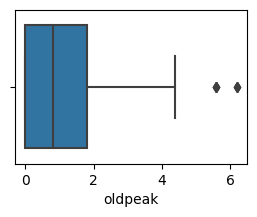

In [60]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["oldpeak"])

In [67]:
q1,q3 = np.quantile(df['oldpeak'], [0.25,0.75])
iqr = q3-q1

upper_tail = q3 + 1.5*iqr
df['oldpeak'] = np.where(df['oldpeak'] >upper_tail, upper_tail, df['oldpeak'] )

<AxesSubplot: xlabel='oldpeak'>

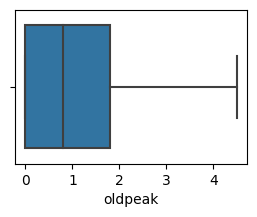

In [68]:
plt.figure(figsize=(3,2))
sns.boxplot(x=df["oldpeak"])

In [76]:
x = df.drop("target", axis = 1)
y = df['target']
x
y
normal_scaler = MinMaxScaler()
array1 = normal_scaler.fit_transform(x)
df = pd.DataFrame(array1, columns= x.columns)

### Model Training & Evaluation:

#### Logistic Regression

In [77]:
x_train, x_test, y_train, y_test = train_test_split(df,y, test_size=0.2, random_state=21, stratify=y )

In [78]:
logistic_reg = LogisticRegression()
logistic_reg.fit(x_train, y_train)

LogisticRegression()

In [79]:
# Data Evaluation

train_score = logistic_reg.score(x_train, y_train)
print("Training Data Accuracy : ", train_score)

test_score = logistic_reg.score(x_test, y_test)
print("Testing Data Accuracy : ", test_score)

Training Data Accuracy :  0.8597560975609756
Testing Data Accuracy :  0.8439024390243902


### KNN Regression

In [81]:
knn_reg = KNeighborsClassifier(n_neighbors=5, p = 2)
knn_reg.fit(x_train, y_train)

KNeighborsClassifier()

In [82]:
train_score = knn_reg.score(x_train, y_train)
print("Training Data Accuracy : ", train_score)

test_score = knn_reg.score(x_test, y_test)
print("Testing Data Accuracy : ", test_score)

Training Data Accuracy :  0.9426829268292682
Testing Data Accuracy :  0.8341463414634146


### save model

In [89]:
with open(r'G:\Python\heart_disease_predic\heart\artifacts/knn_model.pkl', 'wb') as f:
    pickle.dump(knn_reg, f)